Is the graph connected? True


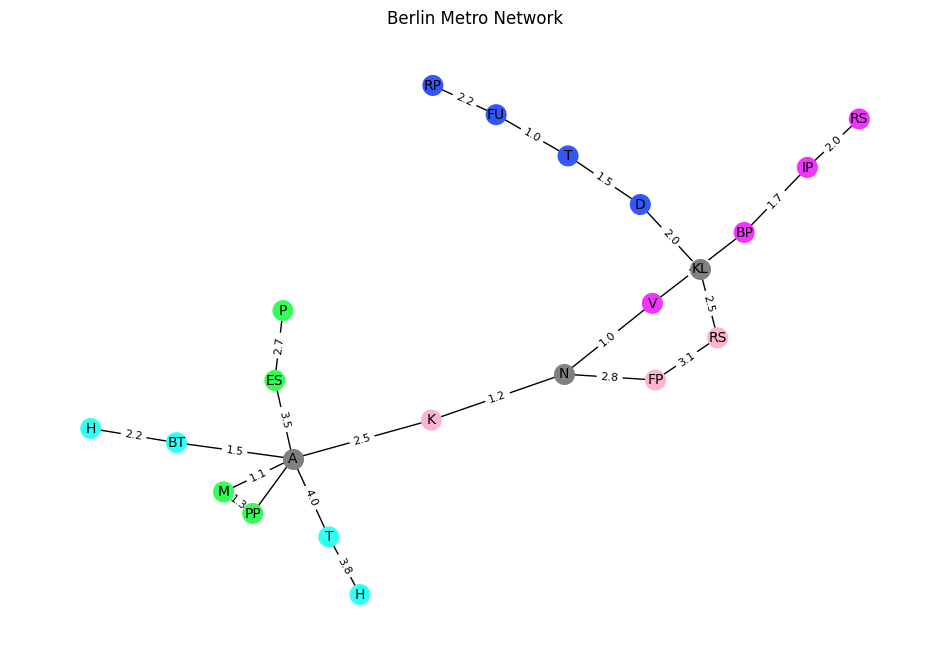

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#Create empty graph
metro_network = nx.Graph()

#Lines and stations
u1_stations = ['Krumme Lanke', 'Rathaus Steglitz', 'Fehrbelliner Platz', 'Nollendorfplatz', 'Kurfürstendamm']
u2_stations = ['Pankow', 'Eberswalder Str.', 'Alexanderplatz', 'Mohrenstr.', 'Potsdamer Platz']
u3_stations = ['Krumme Lanke', 'Dahlem-Dorf', 'Thielplatz', 'Freie Universität', 'Rüdesheimer Platz']
u4_stations = ['Nollendorfplatz', 'Viktoria-Luise-Platz', 'Bayerischer Platz', 'Innsbrucker Platz', 'Rathaus Schöneberg']
u5_stations = ['Hönow', 'Tierpark', 'Alexanderplatz', 'Brandenburger Tor', 'Hauptbahnhof']

# Add the nodes and edges for each line
for line_stations in [u1_stations, u2_stations, u3_stations, u4_stations, u5_stations]:
    metro_network.add_nodes_from(line_stations)
    metro_network.add_edges_from([(line_stations[i], line_stations[i+1]) for i in range(len(line_stations) - 1)])

# Add connections between lines
transfer_connections = [
    ('Nollendorfplatz', 'Fehrbelliner Platz'),  # U1 and U4 connection
    ('Alexanderplatz', 'Potsdamer Platz'),      # U2 and U1 connection
    ('Alexanderplatz', 'Kurfürstendamm'),       # U2 and U1 connection
    ('Alexanderplatz', 'Brandenburger Tor'),    # U2 and U5 connection
    ('Krumme Lanke', 'Dahlem-Dorf')             # U1 and U3 connection
]

metro_network.add_edges_from(transfer_connections)

# if the graph is connected
is_connected = nx.is_connected(metro_network)
print(f"Is the graph connected? {is_connected}")

# color codes for each line
line_colors = {
    'U1': '#FFB2D2',
    'U2': '#33FF57',
    'U3': '#3357FF',
    'U4': '#F333FF',
    'U5': '#33FFF3'
}

#colors to nodes
node_colors = [
    line_colors['U1'] if node in u1_stations else
    line_colors['U2'] if node in u2_stations else
    line_colors['U3'] if node in u3_stations else
    line_colors['U4'] if node in u4_stations else
    line_colors['U5'] if node in u5_stations else '#808080'
    for node in metro_network.nodes()
]

#distances to edges (kilometers)
distances = {
    ('Krumme Lanke', 'Rathaus Steglitz'): 2.5,
    ('Rathaus Steglitz', 'Fehrbelliner Platz'): 3.1,
    ('Fehrbelliner Platz', 'Nollendorfplatz'): 2.8,
    ('Nollendorfplatz', 'Kurfürstendamm'): 1.2,
    ('Pankow', 'Eberswalder Str.'): 2.7,
    ('Eberswalder Str.', 'Alexanderplatz'): 3.5,
    ('Alexanderplatz', 'Mohrenstr.'): 1.1,
    ('Mohrenstr.', 'Potsdamer Platz'): 1.3,
    ('Krumme Lanke', 'Dahlem-Dorf'): 2.0,
    ('Dahlem-Dorf', 'Thielplatz'): 1.5,
    ('Thielplatz', 'Freie Universität'): 1.0,
    ('Freie Universität', 'Rüdesheimer Platz'): 2.2,
    ('Nollendorfplatz', 'Viktoria-Luise-Platz'): 1.0,
    ('Viktoria-Luise-Platz', 'Bayerischer Platz'): 1.2,
    ('Bayerischer Platz', 'Innsbrucker Platz'): 1.7,
    ('Innsbrucker Platz', 'Rathaus Schöneberg'): 2.0,
    ('Hönow', 'Tierpark'): 3.8,
    ('Tierpark', 'Alexanderplatz'): 4.0,
    ('Alexanderplatz', 'Brandenburger Tor'): 1.5,
    ('Brandenburger Tor', 'Hauptbahnhof'): 2.2,
    ('Alexanderplatz', 'Kurfürstendamm') : 2.5
}
# Define transfer and non-transfer stations
transfer_stations = ['Alexanderplatz', 'Nollendorfplatz', 'Krumme Lanke']

# Identify non-transfer stations
non_transfer_stations = [node for node in metro_network.nodes() if node not in transfer_stations]
non_transfer_colors = [
    line_colors['U1'] if node in u1_stations else
    line_colors['U2'] if node in u2_stations else
    line_colors['U3'] if node in u3_stations else
    line_colors['U4'] if node in u4_stations else
    line_colors['U5']
    for node in non_transfer_stations
]

#Distances as attributes to edges
nx.set_edge_attributes(metro_network, distances, 'distance')

# Visualization
plt.figure(figsize=(12, 8))

#Layout definition
pos = nx.spring_layout(metro_network, seed=42, k=0.3)

# Drawing edges non-transfer stations
nx.draw_networkx_nodes(metro_network, pos, nodelist=non_transfer_stations, node_color=non_transfer_colors, node_size=200)

# Drawing edges transfer stations
nx.draw_networkx_nodes(metro_network, pos, nodelist=transfer_stations, node_color='#808080', node_size=200)

# Drawing edges
nx.draw_networkx_edges(metro_network, pos, width=1)

# Adding station labels
#nx.draw_networkx_labels(metro_network, pos, font_size=10)

#labels with station initials
initial_labels = {node: ''.join([word[0] for word in node.split()]) for node in metro_network.nodes()}
nx.draw_networkx_labels(metro_network, pos, labels=initial_labels, font_size=10)

# Distances
edge_labels = nx.get_edge_attributes(metro_network, 'distance')
nx.draw_networkx_edge_labels(metro_network, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

# Showing the graph
plt.title("Berlin Metro Network")
plt.axis('off')
plt.show()